# Predicting Student Performance Scores

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load data

In [9]:
student__maths_data = pd.read_csv(
    'data/student_performance_data/student-por.csv',
    sep=';'
)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
student__portugues_data = pd.read_csv(
    'data/student_performance_data/student-mat.csv',
    sep=';'
)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Data information

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
2 **sex** - student's sex (binary: 'F' - female or 'M' - male)  
3 **age** - student's age (numeric: from 15 to 22)  
4 **address** - student's home address type (binary: 'U' - urban or 'R' - rural)  
5 **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
6 **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
7 **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary** education or 4 â€“ higher education)  
8 **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  
9 **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
10 **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
11 **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
12 **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')  
13 **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 **schoolsup** - extra educational support (binary: yes or no)  
17 **famsup** - family educational support (binary: yes or no)  
18 **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 **activities** - extra-curricular activities (binary: yes or no)  
20 **nursery** - attended nursery school (binary: yes or no)  
21 **higher** - wants to take higher education (binary: yes or no)  
22 **internet** - Internet access at home (binary: yes or no)  
23 **romantic** - with a romantic relationship (binary: yes or no)  
24 **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)  
26 **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 **health** - current health status (numeric: from 1 - very bad to 5 - very good)  
30 **absences** - number of school absences (numeric: from 0 to 93)  

### these grades are related with the course subject, Math or Portuguese:
31 **G1** - first period grade (numeric: from 0 to 20)  
31 **G2** - second period grade (numeric: from 0 to 20)  
32 **G3** - final grade (numeric: from 0 to 20, output target)  

In [28]:
student__maths_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [34]:
numerical_features = ['Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

In [36]:
categorical_features = [x for x in student__maths_data.columns.tolist() if x not in numerical_features]
categorical_features

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

<AxesSubplot:xlabel='G3', ylabel='Count'>

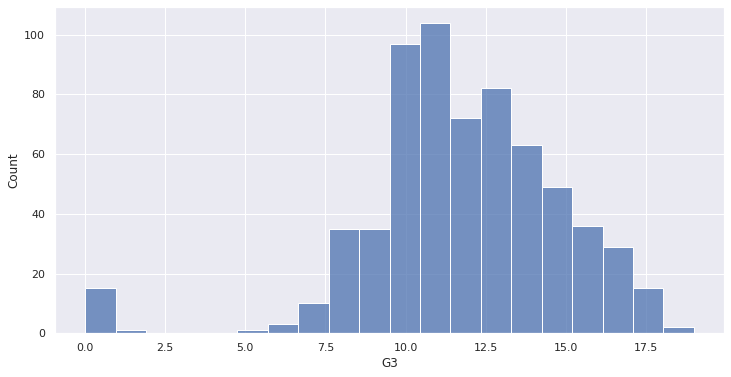

In [18]:
sns.set(rc={'figure.figsize':(12,6)})

sns.histplot(student__maths_data.G3, bins=20)

In [14]:
print(f'Average final grade for maths students: {round(student__maths_data.G3.mean(),2)}')

Average final grade for maths students: 11.91


<AxesSubplot:xlabel='G3', ylabel='Count'>

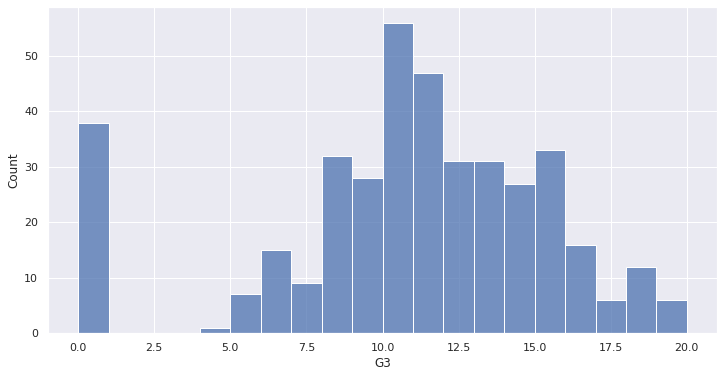

In [19]:
sns.histplot(student__portugues_data.G3, bins=20)

In [15]:
print(f'Average final grade for portugues students: {round(student__portugues_data.G3.mean(),2)}')

Average final grade for portugues students: 10.42
